![alt text](https://i.imgur.com/1WaY7aA.png)


---



---



# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.
![image.png](attachment:image.png)

Apply at https://developer.twitter.com/en/apply-for-access.html
![image.png](attachment:image.png)

Then go to https://developer.twitter.com/en/review every day until you see whatever comes after this: 
![image.png](attachment:image.png)

### 2. Create Your Twitter App
![image.png](attachment:image.png)

### 3. Load Python Libraries

In [1]:
import tweepy
import json
import pprint

import json

auth_twitter = {}  
auth_twitter['credentials'] = []  
auth_twitter['credentials'].append({  
    'my_consumer_key': 'vUyDfvj8nAC8XLMqGSYqI0vgz',
    'my_consumer_secret': 'saQK8IFgzS4cwOl21cR2MLunDOy97z7f6g3oh357AxQYXTCBth',
    'my_access_token':"1149106446342037504-N4sOlMAcJt06gyDILWnWacojvwBTba",
    'access_token_secret':"3uhAqCegtuDLgskerIbMBwzXhxkASadNkjMtuIBfkslTc"
})
with open('auth_twitter.txt', 'w') as outfile:  
    json.dump(auth_twitter, outfile)

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [ ]:
my_consumer_key = ''      # your consumer key (string) goes in here
my_consumer_secret = ''   # your consumer secret key (string) goes in here
my_access_token = ''      # your access token (string goes in here
access_token_secret = ''  # your access token secret (string) goes in here

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "my_consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "my_consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"your access token (string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"my_access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [6]:
pwd()  # make sure your working directory is where the file is

'/Users/Vani/Documents/BlackCat/DSIA-SYD-FT-Projects-201907/Vani/LABS 2'

In [4]:
#path_auth = 'auth_twitter.json'
with open('auth_twitter.txt') as json_file:  
    auth_twitter = json.load(json_file)

# For debugging only:
#pp.pprint(auth)
for p in auth_twitter['credentials']:
    my_consumer_key = p['my_consumer_key']
    my_consumer_secret = p['my_consumer_secret']
    my_access_token = p['my_access_token']
    my_access_token_secret = p['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [5]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In [6]:
auth

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [7]:
api.followers()[0]._json

{'id': 1149103445351096320,
 'id_str': '1149103445351096320',
 'name': 'Sarita Charde',
 'screen_name': 'ChardeSarita',
 'location': '',
 'description': 'Analyst',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 1,
 'friends_count': 3,
 'listed_count': 0,
 'created_at': 'Wed Jul 10 23:49:45 +0000 2019',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 4,
 'lang': None,
 'status': {'created_at': 'Wed Jul 17 05:51:01 +0000 2019',
  'id': 1151368690337583104,
  'id_str': '1151368690337583104',
  'text': 'Test: Data Science is the state-of-the Art',
  'truncated': False,
  'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
  'source': '<a href="https://www.linkedin.com/in/sarita-charde-/" rel="nofollow">CHARDE</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_i

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

This will fetch recent tweets from accounts you follow:

In [54]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

Xi Jinping, general secretary of the CPC Central Committee, highlighted the significance of ecology, rural vitaliza… https://t.co/UTWeXsuoG2
Tweeted new message
Test: Made with Tweepy
I started my DataScience course in Sydney at DSIA
China's civil aviation market delivered 320 million trips in the first half of 2019, up 8.5% YOY. The turnover of t… https://t.co/3I0mZqARzm
The #US will send a high-level delegation to discuss arms control issues with #Russia in Geneva later this week, as… https://t.co/Pkn4l90fsE
You make me feel safe and comfortable https://t.co/6DzMGUVSyq
A full-habitat protection network for black snub-nosed monkeys was set up by local forestry bureau and natural rese… https://t.co/fMg5WvQ1gw
Be professional… and cool: A pineapple seller in Nanning, S China's Guangxi, attracts customers with his pineapple-… https://t.co/pixOWAg2lU
RT @Kunshan_China: Bingdi lotuses blossom at Tinglin Park in #Kunshan. Bingdi lotuses are lotuses that carry a pair of flowers on each flow…

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [55]:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

Tweeted new message
Test: Made with Tweepy
I started my DataScience course in Sydney at DSIA


Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [32]:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)

    print(tweet.text)

2019-07-16 06:07:17
I started my DataScience course in Sydney at DSIA


You can create a tweet as follows:

In [33]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

In [50]:
from twython import Twython

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [62]:
# delete a tweet:
status = api.destroy_status(1151012415489761280)

In [64]:
tweet = api.get_status(1151013240672903176)
print(tweet.text)

Tweeted new message


You can follow a Tweeter:

In [65]:
# follow:
api.create_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x107a463c8>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Pivoting to video.', 'url': 'https://t.co/F3fLcf5sH7', 'entities': {'url': {'urls': [{'url': 'https://t.co/F3fLcf5sH7', 'expanded_url': 'http://youtube.com', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 71661038, 'friends_count': 1041, 'listed_count': 81953, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 2516, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 23554, 'lang': None, 'status': {'created_at': 'Mon Jul 15 18:39:34 +0000 2019', 'id': 1150837326597148672, 'id_str': '1150837326597148672', 'text': 'Can you really fix anything with ramen noodles and super glue? @thekingofrandom finds out! → https://t.co/6t40i28LeR https://t.co/wd5m0pkB1k', 'truncated': Fal

or unfollow:

In [66]:
# unfollow:
api.destroy_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x107a463c8>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Pivoting to video.', 'url': 'https://t.co/F3fLcf5sH7', 'entities': {'url': {'urls': [{'url': 'https://t.co/F3fLcf5sH7', 'expanded_url': 'http://youtube.com', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 71661038, 'friends_count': 1041, 'listed_count': 81953, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 2516, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 23554, 'lang': None, 'status': {'created_at': 'Mon Jul 15 18:39:34 +0000 2019', 'id': 1150837326597148672, 'id_str': '1150837326597148672', 'text': 'Can you really fix anything with ramen noodles and super glue? @thekingofrandom finds out! → https://t.co/6t40i28LeR https://t.co/wd5m0pkB1k', 'truncated': Fal

In [67]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.DataFrame(tweet_list)

In [70]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [71]:
df.dtypes

contributors                 object
coordinates                  object
entities                     object
favorite_count                int64
favorited                      bool
geo                          object
id                            int64
id_str                       object
in_reply_to_screen_name      object
in_reply_to_status_id        object
in_reply_to_status_id_str    object
in_reply_to_user_id          object
in_reply_to_user_id_str      object
is_quote_status                bool
lang                         object
place                        object
retweet_count                 int64
retweeted                      bool
source                       object
text                         object
truncated                      bool
user                         object
dtype: object

In [72]:
df.head()

,contributors,coordinates,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,...,in_reply_to_user_id_str,is_quote_status,lang,place,retweet_count,retweeted,source,text,truncated,user
created_at,,,,,,,,,,,,,,,,,,,,,
2019-07-16 06:18:36,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,None,1151013240672903176,1151013240672903176,None,None,...,None,False,en,None,0,False,"<a href=""https://www.linkedin.com/in/vani-kami...",Tweeted new message,False,"{'id': 1149106446342037504, 'id_str': '1149106..."
2019-07-16 06:15:19,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,None,1151012415489761280,1151012415489761280,None,None,...,None,False,en,None,0,False,"<a href=""https://www.linkedin.com/in/vani-kami...",Test: Made with Tweepy,False,"{'id': 1149106446342037504, 'id_str': '1149106..."
2019-07-16 06:07:17,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,None,1151010395164856320,1151010395164856320,None,None,...,None,False,en,None,0,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",I started my DataScience course in Sydney at DSIA,False,"{'id': 1149106446342037504, 'id_str': '1149106..."


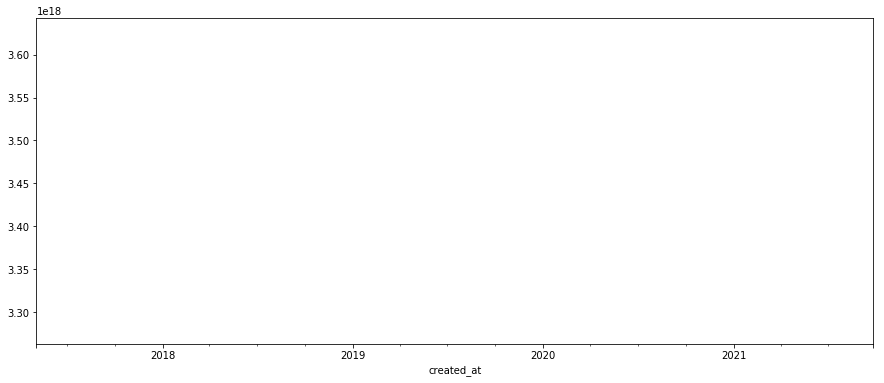

In [73]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6))

In [74]:
from wordcloud import WordCloud, STOPWORDS

In [75]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show()

In [77]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

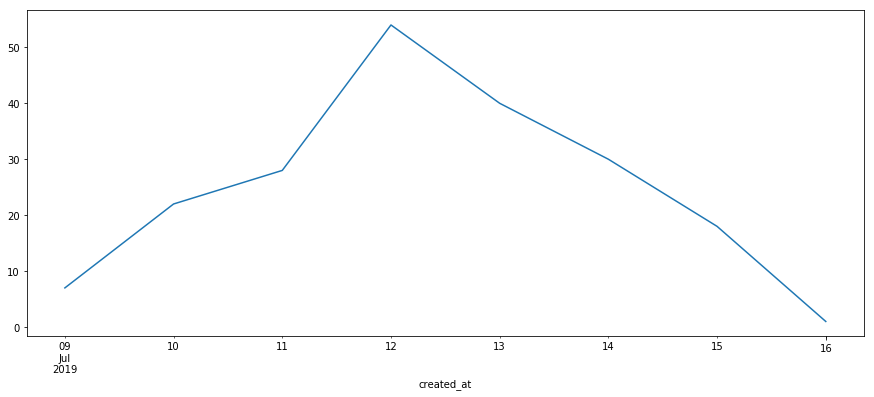

In [78]:
check_tweets('realDonaldTrump')

In [79]:
check_tweets_wordcloud('realDonaldTrump', withall=False)

NameError: name 'TextBlob' is not defined

>
>

>
>



---



---

>  > > > > > > > > © 2019 Data Science Institute of Australia



---



---

